First of all ,  i am glade to reachout the final stage in this great journey with udacity "data advanced track" , it was a fantasitc journey ,i have got a lot of concepts , learnt a lot of data skills that i wanted to be shown here in my final project ...

i searched a lot and finally decided to select this importnat topic ###"COVID-19 World Vaccine Adverse Reactions"###.... dataset by The Vaccine Adverse Event Reporting System (VAERS) .

VAERS was created by the Food and Drug Administration (FDA) and Centers for Disease Control and Prevention (CDC) to receive reports about adverse events that may be associated with vaccines
all references will be attached later in the last cells 


# COVID-19 World Vaccine Adverse Reactions



# Table of Content

<ul>
<li><a href="#Int"> Introduction </a></li>    
<li><a href="#disc">Discover & Clean data</a></li>
<li><a href="#Uni">Univariate Exploration</a></li>    
<li><a href="#Bi">Bivariate Exploration</a></li>  
<li><a href="#MU">Multivariate Exploration</a></li>     
<li><a href="#cr">Conclusion & Recommendation </a></li>    
<li><a href="#re">References </a></li>  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

<a id='Int'></a>

# Introduction 

* I have selected the following topic to be investigated "COVID-19 World Vaccine Adverse Reactions"... 
* Dataset by The Vaccine Adverse Event Reporting System (VAERS) . Downloaded from kaggle.com , (link will be inserted in the references last cell )

* VAERS was created by the Food and Drug Administration (FDA) and Centers for Disease Control and Prevention (CDC) to receive reports about adverse events that may be associated with vaccines all references will be attached later in the last cells

* I will work on 2 CSV files 



## Read & Merge CSV Files

In [2]:
#read data ... i will use two data csv files 

A = pd.read_csv("2021VAERSDATA.csv", encoding = 'unicode_escape', engine ='python')

#used this code  "encoding = 'unicode_escape', engine ='python'"  to solve reading error that happened 

B = pd.read_csv("2021VAERSVAX.csv")



In [3]:
#overview look on data A

A.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [4]:
A.tail()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
34116,1113917,03/19/2021,FL,88.0,87.0,NaN,F,NaN,throat closure three weeks after second dose; ...,NaN,...,NaN,Medical History/Concurrent Conditions: Aortic ...,NaN,"USMODERNATX, INC.MOD20210",2,03/12/2021,NaN,NaN,Y,NaN
34117,1113920,03/19/2021,PA,83.0,NaN,NaN,F,NaN,positive COVID-19 test with no symptoms; Asymp...,NaN,...,NaN,Medical History/Concurrent Conditions: Atrial ...,NaN,USPFIZER INC2021231682,2,03/16/2021,NaN,Y,NaN,NaN
34118,1113963,03/19/2021,MS,59.0,NaN,NaN,F,NaN,HLH (hemophagocyticlymphohistiocytosis); This ...,Y,...,NaN,Medical History/Concurrent Conditions: Type II...,NaN,USPFIZER INC2021257356,2,03/12/2021,NaN,NaN,NaN,NaN
34119,1115045,03/19/2021,AZ,57.0,NaN,NaN,M,NaN,Death; A spontaneous report was received from ...,Y,...,NaN,Medical History/Concurrent Conditions: No adve...,NaN,"USMODERNATX, INC.MOD20210",2,03/15/2021,NaN,NaN,NaN,NaN
34120,1115348,03/19/2021,NC,NaN,85.0,NaN,F,NaN,death; A spontaneous report was received from ...,Y,...,NaN,Comments: List of non-encoded Patient Relevant...,NaN,"USMODERNATX, INC.MOD20210",2,03/12/2021,NaN,NaN,NaN,NaN


In [5]:
#DATA SIZE

A.shape

(34121, 35)

In [6]:
#over view look on B data

B.head()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [7]:
B.tail()

,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
34625,1113917,COVID19,MODERNA,01120A,1,OT,NaN,COVID19 (COVID19 (MODERNA))
34626,1113920,COVID19,PFIZER\BIONTECH,Unknown,1,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
34627,1113963,COVID19,PFIZER\BIONTECH,EL9264,2,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
34628,1115045,COVID19,MODERNA,NaN,2,OT,NaN,COVID19 (COVID19 (MODERNA))
34629,1115348,COVID19,MODERNA,026A21A,1,OT,LA,COVID19 (COVID19 (MODERNA))


In [8]:
#data size

B.shape

(34630, 8)

In [9]:
# merge A & B

VAX = A.merge(B , on= 'VAERS_ID' , how= 'left')
VAX.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Y,NaN,Pcn and bee venom,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Y,NaN,"""Dairy""",COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,NaN,Y,Shellfish,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,NaN,NaN,Na,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [10]:
# data size after merge

VAX.shape

(34630, 42)

<a id='disc'></a>

## Discover & Clean Data

In the following cells i am going to discover ,  and understand the whole dataset 

In [11]:
#check nan values  in ID columns

VAX['VAERS_ID'].isnull().sum()


0

In [12]:
#check unique ID

VAX['VAERS_ID'].nunique()

34121

In [13]:
#check duplicates in ID

VAX['VAERS_ID'].duplicated().sum()


509

In [14]:
#Display some duplicated rows

VAX[VAX['VAERS_ID'].duplicated()].head(10)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
287,916918,01/01/2021,WI,0.33,0.0,0.4,M,NaN,Slight fever the day of the injections. The ne...,NaN,...,NaN,Y,None,HIBV,SANOFI PASTEUR,NaN,2,NaN,LG,HIB (ACTHIB)
288,916918,01/01/2021,WI,0.33,0.0,0.4,M,NaN,Slight fever the day of the injections. The ne...,NaN,...,NaN,Y,None,RV1,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,NaN,LG,ROTAVIRUS (ROTARIX)
289,916918,01/01/2021,WI,0.33,0.0,0.4,M,NaN,Slight fever the day of the injections. The ne...,NaN,...,NaN,Y,None,UNK,UNKNOWN MANUFACTURER,NaN,2,NaN,LG,VACCINE NOT SPECIFIED (OTHER)
446,917087,01/01/2021,NC,47.00,47.0,NaN,F,NaN,Significant fatigue 24 hours after injection. ...,NaN,...,NaN,NaN,None,COVID19,PFIZER\BIONTECH,NaN,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
970,921210,01/02/2021,TX,65.00,NaN,NaN,F,NaN,Had my first Shingrix vaccination on Oct 29 20...,NaN,...,NaN,NaN,demerol ..pine trees,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,3099,1,IM,NaN,ZOSTER (SHINGRIX)
1418,918140,01/04/2021,NaN,NaN,NaN,NaN,M,NaN,Has Bells Palsy as a result; Side of the body ...,NaN,...,NaN,NaN,NaN,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,UNK,2,NaN,NaN,ZOSTER (SHINGRIX)
2484,919453,01/04/2021,CA,49.00,49.0,NaN,F,NaN,"Right wrist rash, 4cm x 2.5cm, with vesicles t...",NaN,...,NaN,NaN,NKDA/EA/FA,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
2636,919620,01/04/2021,WA,81.00,81.0,NaN,M,NaN,Decompensation and temp 103.6.,NaN,...,NaN,NaN,No,UNK,UNKNOWN MANUFACTURER,EL0140,1,NaN,UN,VACCINE NOT SPECIFIED (NO BRAND NAME)
3225,920270,01/05/2021,NaN,NaN,NaN,NaN,F,NaN,weakness; This is a spontaneous report from a ...,NaN,...,NaN,NaN,NaN,UNK,UNKNOWN MANUFACTURER,NaN,UNK,NaN,NaN,VACCINE NOT SPECIFIED (NO BRAND NAME)
3229,920275,01/05/2021,NaN,24.00,NaN,NaN,F,NaN,seizure; high fever; Initial information was r...,NaN,...,NaN,NaN,NaN,DT,UNKNOWN MANUFACTURER,NaN,UNK,OT,NaN,DT ADSORBED (NO BRAND NAME)


In [15]:
#remove duplicated ID

VAX.drop_duplicates(subset = 'VAERS_ID' , keep = 'first' , inplace = True)


In [16]:
#size after cleaning

VAX.shape

(34121, 42)

In [17]:
# overview of data shape and composition

print(VAX.dtypes)


VAERS_ID             int64
RECVDATE            object
STATE               object
AGE_YRS            float64
CAGE_YR            float64
CAGE_MO            float64
SEX                 object
RPT_DATE            object
SYMPTOM_TEXT        object
DIED                object
DATEDIED            object
L_THREAT            object
ER_VISIT            object
HOSPITAL            object
HOSPDAYS           float64
X_STAY              object
DISABLE             object
RECOVD              object
VAX_DATE            object
ONSET_DATE          object
NUMDAYS            float64
LAB_DATA            object
V_ADMINBY           object
V_FUNDBY            object
OTHER_MEDS          object
CUR_ILL             object
HISTORY             object
PRIOR_VAX           object
SPLTTYPE            object
FORM_VERS            int64
TODAYS_DATE         object
BIRTH_DEFECT        object
OFC_VISIT           object
ER_ED_VISIT         object
ALLERGIES           object
VAX_TYPE            object
VAX_MANU            object
V

In [18]:
# descriptive statistics for numeric variables
VAX.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,3.412100e+04,30933.000000,26791.000000,83.000000,2857.000000,31194.000000,34121.000000
mean,9.813066e+05,51.471923,51.135381,0.084337,3.752888,21.077066,1.998124
std,6.204535e+04,18.521742,18.633316,0.178395,3.878654,644.834400,0.043269
min,9.166000e+05,0.080000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,9.264640e+05,37.000000,36.000000,0.000000,1.000000,0.000000,2.000000
50%,9.468370e+05,50.000000,49.000000,0.000000,3.000000,1.000000,2.000000
75%,1.047069e+06,65.000000,65.000000,0.000000,5.000000,3.000000,2.000000
max,1.115348e+06,115.000000,106.000000,0.700000,39.000000,36896.000000,2.000000


### As we see , large amount of columns that couldn't shown all on above table , now we are going to discover the hidden columns  and determine which of them we won't need 

In [19]:
VAX.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES', 'VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES',
       'VAX_ROUTE', 'VAX_SITE', 'VAX_NAME'],
      dtype='object')

### Explain columns  ###reference: pdf will be attached later

1-'VAERS_ID' = VAERS Identification Number

2-'RECVDATE' = Receive Date : The date the VAERS form information was received 
to our processing center

3-'STATE' =  The two-letter US Postal Service abbreviation for the home state 
of the vaccinee. Please note that all foreign reports are contained in a separate data 
file. 

4-'AGE_YRS' = The recorded vaccine recipient's age in years.

5-'CAGE_YR' =  Age of patient in years 

6-'CAGE_MO' = Age of patient in months . The values for this variable range from 0 to <1. It is only calculated for 
patients age 2 years or less. 

7-'SEX' = Sex of the vaccine recipient (M = Male, F = Female, Unknown = Blank).

8-'RPT_DATE' = Date the VAERS form was completed by the reporter as recorded on the specified field of the form. This is a VAERS 1 form field only.

9-'SYMPTOM_TEXT' = This is the symptom text 
recorded in the form. MedDRA Terms are derived from this text and placed in the 
VAERSSYMPTOMS file

10-'DIED' =  If the vaccine recipient died a "Y" is used; otherwise the field 
will be blank

11-'DATEDIED' = Date of Death: If the vaccine recipient died there is space in 
this field to record the date of death; otherwise the field will be blank.

12-'L_THREAT' =  Life Threatening : If the vaccine recipient had a lifethreatening event associated with the vaccination a "Y" is placed is used;
otherwise the field will be blank


13-'ER_VISIT' = Emergency Room (ER_VISIT): If the vaccine recipient required an 
emergency room or doctor visit a "Y" is placed in this field; otherwise the 
field will be blank. If this is the only option checked the report is not 
considered serious. This is a VAERS 1 form field only

14-'HOSPITAL' = Hospitalized (HOSPITAL): If the vaccine recipient was hospitalized as a 
result of the vaccination a "Y" is used; otherwise the field will be blank.

15-'HOSPDAYS' = Days Hospitalized (HOSPDAYS): If the reporter checked that the vaccine 
recipient was hospitalized a space is provided in this field to record the 
number of days hospitalized; otherwise the field will be blank.

16-'X_STAY' = Prolonged Hospitalization (X_STAY): If a patient's hospitalization is 
prolonged as a result of the adverse event associated with the vaccination 
a "Y" will be placed in this field; otherwise the field will be blank

17-'DISABLE' = Disability (DISABLE): If the vaccine recipient was disabled as a result of 
the vaccination a "Y" is placed in this field; otherwise the field will be 
blank

18-'RECOVD' =  Recovered (RECOVD): A "Y" is placed in the field if the vaccine recipient 
recovered from the adverse event. "N" indicates that the vaccinee has not recovered 
from the adverse event. "U" or blank indicates that the vaccine recipient's recovery 
status is unknown

19-'VAX_DATE' = Vaccination Date: The date of vaccination as recorded in the 
specified field of the form.

20-'ONSET_DATE' = Onset Date (ONSET_DATE): The date of the onset of adverse event symptoms 
associated with the vaccination as recorded in the specified field of the form.

21-'NUMDAYS' =  Onset Interval (NUMDAYS): The calculated interval (in days) from the 
vaccination date to the onset date

22-'LAB_DATA' = Relevant Diagnostic Tests/Laboratory Data (LAB_DATA): This text field 
contains narrative about any relevant diagnostic tests or laboratory results as 
recorded on the specified field of the form


23-'V_ADMINBY' = Vaccine Administered at (V_ADMINBY): The reporter may note on the VAERS 
form the type of facility administering the vaccine. The options are different 
depending on the form version; additional options were added on the VAERS 2
form.

24-'V_FUNDBY' = ) Vaccine Purchased with (V_FUNDBY): This is a VAERS 1 field only. The 
reporter may note in Box 16 on the VAERS form which type of funds were used to 
purchase the vaccines administered in Box 13 (PUB=Public, PVT=Private, 
MIL=Military; OTH=Other/Unknown)


25-'OTHER_MEDS' = Other Medications (OTHER_MEDS): This text field contains narrative about 
any prescription or non-prescription drugs the vaccine recipient was taking at the 
time of vaccination as recorded on the specified field of the form.

26-'CUR_ILL' = Current Illnesses (CUR_ILL): This text field contains narrative about any 
illnesses at the time of the vaccination as noted on the specified field of the form


27-'HISTORY' = Pre-existing Conditions (HISTORY): This text field contains narrative about 
any pre-existing physician-diagnosed birth defects or medical condition that existed 
at the time of vaccination as noted on the specified field of the form. For the VAERS 
1 form, this field also includes pre-existing physician-diagnosed allergies.

28-'PRIOR_VAX' = Prior Vaccination Event Information (PRIOR_VAX): This field provides prior 
vaccination event information as recorded on the specified field of the form


29-'SPLTTYPE' = Manufacturer Number (SPLTTYPE): Manufacturer number or Immunization 
Project number as recorded on the specified field of the form

30-'FORM_VERS' = VAERS form version 1 or 2

31-'TODAYS_DATE' = Date Form Completed

32-'BIRTH_DEFECT' = Congenital Anomaly or Birth Defect (BIRTH_DEFECT): If the vaccine 
recipient had a congenital anomaly or birth defect associated with the 
vaccination, a "Y" is used; otherwise the field will be blank. This is a 
VAERS 2 form field only

33-'OFC_VISIT' = Doctor or other healthcare provider office/clinic visit 

34-'ER_ED_VISIT' = Emergency room/department or urgent care

35-'ALLERGIES' = Allergies to medications, food or other products (ALLERGIES): This text 
field contains narrative about any pre-existing physician-diagnosed allergies that 
existed at the time of vaccination as noted in the specified field of the form. This is a 
VAERS 2 form field only.
36-'VAX_TYPE'= Administered Vaccine Type

37-'VAX_MANU' = Vaccine Manufacturer
38-'VAX_LOT' = Manufacturer's Vaccine Lot
39-'VAX_DOSE_SERIES' = Number of doses administered
40-'VAX_ROUTE' = Vaccination Route
41-'VAX_SITE' = Vaccination Site
42-'VAX_NAME' = Vaccination Name






In [20]:
#display all entire columns 

pd.set_option('display.max_columns', None)

VAX.sample(10)


,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
27438,1049498,02/23/2021,OH,41.0,41.0,NaN,M,NaN,"After I went to bed, I started running a fever...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,02/22/2021,02/23/2021,1.0,NaN,MIL,NaN,Daily multivitamin,None,None,NaN,NaN,2,02/23/2021,NaN,NaN,NaN,None known,COVID19,PFIZER\BIONTECH,NaN,2,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
30391,1068028,03/03/2021,NJ,42.0,NaN,NaN,M,NaN,Nasal congestion; sore throat; This is a spont...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,01/29/2021,01/30/2021,1.0,NaN,PUB,NaN,NaN,NaN,Medical History/Concurrent Conditions: Diabeti...,NaN,USPFIZER INC2021093318,2,03/01/2021,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,NaN,1,NaN,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3584,920722,01/05/2021,MI,54.0,54.0,NaN,F,NaN,Started to feel dizzy about9 hours after the v...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,01/04/2021,01/04/2021,0.0,NaN,WRK,NaN,Multivitamin and Vitamin D,None,Tendonosis of right elbow,NaN,NaN,2,01/05/2021,NaN,NaN,NaN,PCN,COVID19,PFIZER\BIONTECH,EK9231,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
34193,1100465,03/15/2021,FL,80.0,NaN,NaN,F,NaN,Very high glucose + 300 with need for more tha...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,02/14/2021,02/01/2021,NaN,Test Name: very high glucose + 300; Result Uns...,OTH,NaN,TOPROL XL; KCL; LASIX [FUROSEMIDE]; SPIRONOLAC...,NaN,Medical History/Concurrent Conditions: Diabete...,NaN,USPFIZER INC2021205880,2,03/09/2021,NaN,Y,NaN,NaN,COVID19,PFIZER\BIONTECH,EM9810,1,NaN,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
17047,933761,01/11/2021,WI,45.0,45.0,NaN,F,NaN,Woke up at 7am at 8:15am both of my eyes swell...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,01/08/2021,01/09/2021,1.0,None,PVT,NaN,NaN,None,Asthma Allergies Obstructive Sleep Apnea Syndr...,NaN,NaN,2,01/11/2021,NaN,NaN,Y,Sulfa Drugs Hydromorphone Hcl Acetaminophen-Co...,COVID19,PFIZER\BIONTECH,el0142,2,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4856,922239,01/05/2021,PA,43.0,43.0,NaN,M,NaN,Patient reported after the 15 min observation ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,01/05/2021,01/05/2021,0.0,None,SEN,NaN,NaN,N/a,N/a,NaN,NaN,2,01/05/2021,NaN,Y,NaN,NaN,COVID19,PFIZER\BIONTECH,EK9231,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
15330,991265,01/09/2021,NaN,45.0,44.0,NaN,F,NaN,"Headache, Fever & NauseaVomiting",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/28/2020,12/28/2020,0.0,NaN,OTH,NaN,NaN,NaN,NaN,unknown,NaN,2,01/06/2021,NaN,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,EK9231,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
30830,1070583,03/03/2021,KS,66.0,66.0,NaN,M,NaN,He complained of dizziness the evening of the ...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,02/23/2021,02/23/2021,0.0,CT Scan,PUB,NaN,NaN,NaN,NaN,NaN,NaN,2,03/03/2021,NaN,NaN,NaN,NaN,COVID19,MODERNA,030L20A,2,IM,LA,COVID19 (COVID19 (MODERNA))
19159,960486,01/20/2021,NaN,94.0,94.0,NaN,F,NaN,admitted to hospital 1/11/2020 with Acute resp...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,U,01/09/2021,01/11/2021,2.0,NaN,UNK,NaN,NaN,NaN,ANEMIA,NaN,NaN,2,01/20/2021,NaN,NaN,Y,NaN,COVID19,PFIZER\BIONTECH,EL1283,UNK,NaN,NaN,COVID19 (COVID19 (PFIZER-BIONTECH))
7793,925366,01/07/2021,IN,51.0,51.0,NaN,F,NaN,Urinary Tract Infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,01/05/2021,01/06/2021,1.0,NaN,PVT,NaN,Advair 250/50 Tamoxifen Montelukast (singulair),NaN,Asthma and Allergies Breast Cancer (6 years ago),NaN,NaN,2,01/07/2021,NaN,Y,NaN,Penicillin Sulfa Nuts Milk Eggs Dust Pets,COVID19,PFIZER\BIONTECH,EL1Z84,1,NaN,RA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [21]:
#how many vax_type in our data

VAX['VAX_TYPE'].nunique()

31

In [22]:
#Discover unique types of VAX

VAX.groupby('VAX_TYPE').count()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
VAX_TYPE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ANTH,1,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,1,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1
CHOL,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1
COVID19,33796,33796,28298,30760,26646,69,33796,63,33794,1904,1758,1244,11,4294,2824,49,815,30974,32404,32074,31030,14996,33796,64,20133,15957,22241,1434,8025,33796,33597,51,5344,5487,18501,33796,23037,33745,25619,26216,33796
DT,1,1,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1
DTAP,5,5,3,2,3,2,5,0,5,1,1,0,0,0,0,0,0,5,3,3,3,2,5,0,2,2,2,0,3,5,5,0,2,0,2,5,3,5,4,2,5
DTAPHEPBIP,2,2,2,2,2,2,2,0,2,0,0,0,0,2,1,0,0,1,2,2,2,2,2,0,1,1,1,0,0,2,2,0,0,2,1,2,0,2,0,1,2
DTAPIPVHIB,2,2,2,2,1,1,2,0,2,0,0,0,0,1,1,0,1,2,1,1,1,1,2,0,1,1,1,0,1,2,2,0,0,1,1,2,0,2,1,1,2
DTP,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1
FLU3,5,5,4,3,3,0,5,0,5,0,0,1,0,1,0,0,1,5,4,4,3,1,5,0,0,0,0,0,5,5,5,0,0,1,0,5,4,5,5,2,5


In [23]:
#i will focus on covid 19 only so i create new dataframe include only covid 19 i will call it 'VAX19'

COVID19 = ['COVID19']
VAX19 = VAX[VAX.VAX_TYPE.isin(COVID19)]


In [24]:
VAX19.nunique()

VAERS_ID           33796
RECVDATE              78
STATE                 60
AGE_YRS              112
CAGE_YR              100
CAGE_MO                6
SEX                    3
RPT_DATE              24
SYMPTOM_TEXT       32872
DIED                   1
DATEDIED              92
L_THREAT               1
ER_VISIT               1
HOSPITAL               1
HOSPDAYS              34
X_STAY                 1
DISABLE                1
RECOVD                 3
VAX_DATE             188
ONSET_DATE           143
NUMDAYS              113
LAB_DATA            8849
V_ADMINBY              9
V_FUNDBY               4
OTHER_MEDS         14925
CUR_ILL             4178
HISTORY            11469
PRIOR_VAX           1321
SPLTTYPE            6314
FORM_VERS              2
TODAYS_DATE           96
BIRTH_DEFECT           1
OFC_VISIT              1
ER_ED_VISIT            1
ALLERGIES           7755
VAX_TYPE               1
VAX_MANU               4
VAX_LOT             2097
VAX_DOSE_SERIES        8
VAX_ROUTE              7


# The goal of investigation is determine  the most variables who have a strong affect on DIED records


In [25]:
VAX19.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,ER_VISIT,HOSPITAL,HOSPDAYS,X_STAY,DISABLE,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,LAB_DATA,V_ADMINBY,V_FUNDBY,OTHER_MEDS,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/28/2020,12/30/2020,2.0,None,PVT,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom,COVID19,MODERNA,037K20A,1,IM,LA,COVID19 (COVID19 (MODERNA))
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy""",COVID19,MODERNA,025L20A,1,IM,RA,COVID19 (COVID19 (MODERNA))
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U,12/31/2020,12/31/2020,0.0,NaN,SEN,NaN,None,None,None,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish,COVID19,PFIZER\BIONTECH,EL1284,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,12/23/2020,12/23/2020,0.0,none,WRK,NaN,none,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom...",COVID19,MODERNA,unknown,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,12/22/2020,12/29/2020,7.0,NaN,PUB,NaN,Na,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na,COVID19,MODERNA,NaN,1,IM,LA,COVID19 (COVID19 (MODERNA))


In [26]:
#discover unique vax manu

VAX19['VAX_MANU'].unique()

array(['MODERNA', 'PFIZER\\BIONTECH', 'UNKNOWN MANUFACTURER', 'JANSSEN'],
      dtype=object)

In [27]:
#discover unique vax name

VAX19['VAX_NAME'].unique()

array(['COVID19 (COVID19 (MODERNA))',
       'COVID19 (COVID19 (PFIZER-BIONTECH))',
       'COVID19 (COVID19 (UNKNOWN))', 'COVID19 (COVID19 (JANSSEN))'],
      dtype=object)

* i will work with VAX_MANU

In [28]:
#select data frame that contains the main columns which i will used in my report , 
#foucsing on specific columns  that i see it will be very important in my analysis

VAX19X= pd.DataFrame(VAX19, columns = ['VAERS_ID','STATE','CAGE_YR' ,'SEX','DIED','DATEDIED', 'VAX_DATE' ,'ER_VISIT' ,'L_THREAT','HOSPDAYS','VAX_TYPE','VAX_MANU'  ])

In [29]:
VAX19X.head(5)

,VAERS_ID,STATE,CAGE_YR,SEX,DIED,DATEDIED,VAX_DATE,ER_VISIT,L_THREAT,HOSPDAYS,VAX_TYPE,VAX_MANU
0,916600,TX,33.0,F,NaN,NaN,12/28/2020,NaN,NaN,NaN,COVID19,MODERNA
1,916601,CA,73.0,F,NaN,NaN,12/31/2020,NaN,NaN,NaN,COVID19,MODERNA
2,916602,WA,23.0,F,NaN,NaN,12/31/2020,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
3,916603,WA,58.0,F,NaN,NaN,12/23/2020,NaN,NaN,NaN,COVID19,MODERNA
4,916604,TX,47.0,F,NaN,NaN,12/22/2020,NaN,NaN,NaN,COVID19,MODERNA


In [30]:
VAX19X.shape

(33796, 12)

In [31]:
VAX19X.columns

Index(['VAERS_ID', 'STATE', 'CAGE_YR', 'SEX', 'DIED', 'DATEDIED', 'VAX_DATE',
       'ER_VISIT', 'L_THREAT', 'HOSPDAYS', 'VAX_TYPE', 'VAX_MANU'],
      dtype='object')

In [32]:
VAX19X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33796 entries, 0 to 34629
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   VAERS_ID  33796 non-null  int64  
 1   STATE     28298 non-null  object 
 2   CAGE_YR   26646 non-null  float64
 3   SEX       33796 non-null  object 
 4   DIED      1904 non-null   object 
 5   DATEDIED  1758 non-null   object 
 6   VAX_DATE  32404 non-null  object 
 7   ER_VISIT  11 non-null     object 
 8   L_THREAT  1244 non-null   object 
 9   HOSPDAYS  2824 non-null   float64
 10  VAX_TYPE  33796 non-null  object 
 11  VAX_MANU  33796 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.4+ MB


In [33]:
# describtive statistics for numeric variables

VAX19X.describe()

,VAERS_ID,CAGE_YR,HOSPDAYS
count,3.379600e+04,26646.000000,2824.000000
mean,9.814935e+05,51.133341,3.734419
std,6.216630e+04,18.568752,3.867392
min,9.166000e+05,0.000000,1.000000
25%,9.264658e+05,36.000000,1.000000
50%,9.467565e+05,49.000000,3.000000
75%,1.047135e+06,65.000000,5.000000
max,1.115348e+06,106.000000,39.000000


In [34]:
#explore missing values

VAX19X.isna().any() 

VAERS_ID    False
STATE        True
CAGE_YR      True
SEX         False
DIED         True
DATEDIED     True
VAX_DATE     True
ER_VISIT     True
L_THREAT     True
HOSPDAYS     True
VAX_TYPE    False
VAX_MANU    False
dtype: bool

In [35]:
VAX19X.isnull().sum()

VAERS_ID        0
STATE        5498
CAGE_YR      7150
SEX             0
DIED        31892
DATEDIED    32038
VAX_DATE     1392
ER_VISIT    33785
L_THREAT    32552
HOSPDAYS    30972
VAX_TYPE        0
VAX_MANU        0
dtype: int64

# Note
Nan values in the following columns  :
     ['DIED', 'DATEDIED',  'ER_VISIT', 'L_THREAT',  'HOSPDAYS', ], have a meaning as mentioned above in "Explain columns" section  , so it is not a missing data and no need to be cleaned


     

##### For STATE & CAGE_YR there are many null values (5498 & 7150) need to be cleaned 

In [36]:
VAX19X[VAX19X['STATE'].isnull()]

,VAERS_ID,STATE,CAGE_YR,SEX,DIED,DATEDIED,VAX_DATE,ER_VISIT,L_THREAT,HOSPDAYS,VAX_TYPE,VAX_MANU
21,916624,NaN,27.0,F,NaN,NaN,12/23/2020,NaN,NaN,NaN,COVID19,MODERNA
76,916681,NaN,33.0,F,NaN,NaN,12/23/2020,NaN,NaN,NaN,COVID19,MODERNA
89,916695,NaN,34.0,F,NaN,NaN,12/30/2020,NaN,NaN,NaN,COVID19,MODERNA
133,916749,NaN,33.0,M,NaN,NaN,12/30/2020,NaN,NaN,NaN,COVID19,MODERNA
146,916764,NaN,53.0,F,NaN,NaN,12/22/2020,NaN,NaN,NaN,COVID19,MODERNA
...,...,...,...,...,...,...,...,...,...,...,...,...
34578,1110673,NaN,83.0,M,Y,03/17/2021,01/28/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
34580,1110693,NaN,79.0,M,Y,03/17/2021,02/05/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
34583,1110712,NaN,93.0,F,Y,03/12/2021,02/27/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
34584,1110732,NaN,66.0,F,Y,02/08/2021,01/20/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH


In [37]:
VAX19X[VAX19X['STATE'].notnull()]

,VAERS_ID,STATE,CAGE_YR,SEX,DIED,DATEDIED,VAX_DATE,ER_VISIT,L_THREAT,HOSPDAYS,VAX_TYPE,VAX_MANU
0,916600,TX,33.0,F,NaN,NaN,12/28/2020,NaN,NaN,NaN,COVID19,MODERNA
1,916601,CA,73.0,F,NaN,NaN,12/31/2020,NaN,NaN,NaN,COVID19,MODERNA
2,916602,WA,23.0,F,NaN,NaN,12/31/2020,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
3,916603,WA,58.0,F,NaN,NaN,12/23/2020,NaN,NaN,NaN,COVID19,MODERNA
4,916604,TX,47.0,F,NaN,NaN,12/22/2020,NaN,NaN,NaN,COVID19,MODERNA
...,...,...,...,...,...,...,...,...,...,...,...,...
34625,1113917,FL,87.0,F,NaN,NaN,01/13/2021,NaN,NaN,NaN,COVID19,MODERNA
34626,1113920,PA,NaN,F,NaN,NaN,02/09/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
34627,1113963,MS,NaN,F,Y,02/15/2021,02/05/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
34628,1115045,AZ,NaN,M,Y,03/02/2021,03/02/2021,NaN,NaN,NaN,COVID19,MODERNA


In [38]:
#let's drop all rows that have null values in STATE & CAGE_YR

VAXC= VAX19X.dropna(subset =['STATE' , 'CAGE_YR'])
VAXC

,VAERS_ID,STATE,CAGE_YR,SEX,DIED,DATEDIED,VAX_DATE,ER_VISIT,L_THREAT,HOSPDAYS,VAX_TYPE,VAX_MANU
0,916600,TX,33.0,F,NaN,NaN,12/28/2020,NaN,NaN,NaN,COVID19,MODERNA
1,916601,CA,73.0,F,NaN,NaN,12/31/2020,NaN,NaN,NaN,COVID19,MODERNA
2,916602,WA,23.0,F,NaN,NaN,12/31/2020,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
3,916603,WA,58.0,F,NaN,NaN,12/23/2020,NaN,NaN,NaN,COVID19,MODERNA
4,916604,TX,47.0,F,NaN,NaN,12/22/2020,NaN,NaN,NaN,COVID19,MODERNA
...,...,...,...,...,...,...,...,...,...,...,...,...
34622,1113563,HI,70.0,M,Y,03/06/2021,02/24/2021,NaN,NaN,2.0,COVID19,MODERNA
34623,1113915,LA,77.0,F,NaN,NaN,01/25/2021,NaN,NaN,NaN,COVID19,MODERNA
34624,1113916,NY,85.0,M,NaN,NaN,02/01/2021,NaN,NaN,3.0,COVID19,MODERNA
34625,1113917,FL,87.0,F,NaN,NaN,01/13/2021,NaN,NaN,NaN,COVID19,MODERNA


In [39]:
VAXC.isnull().sum()

VAERS_ID        0
STATE           0
CAGE_YR         0
SEX             0
DIED        21490
DATEDIED    21559
VAX_DATE        0
ER_VISIT    22961
L_THREAT    21907
HOSPDAYS    20526
VAX_TYPE        0
VAX_MANU        0
dtype: int64

In [40]:
VAXC.shape

(22971, 12)

In [41]:


VAXC.nunique()

VAERS_ID    22971
STATE          58
CAGE_YR        99
SEX             3
DIED            1
DATEDIED       86
VAX_DATE      157
ER_VISIT        1
L_THREAT        1
HOSPDAYS       33
VAX_TYPE        1
VAX_MANU        4
dtype: int64

In [42]:
#final check of null values

VAXC['STATE'].isnull().sum()

0

In [43]:
VAXC['CAGE_YR'].isnull().sum()

0

In [44]:
VAXC['SEX'].isnull().sum()

0

In [45]:
VAXC['VAX_TYPE'].isnull().sum()

0

In [46]:
VAXC['VAX_MANU'].isnull().sum()

0

### Now My Data is Tidy and Ready for Exploration 

#  The structure of  dataset

Data is mixed between categorical & numeric variables with original size after merge 34630 rows & 42 columns , after discovering and cleaning size become  22971 rows & 12 cloumns only 

# The main feature(s) of interest & features in the dataset that i think will help support my investigation

the data set is about statistcs regarding vaccine receipts , in my investigation i will foucus on DIED statiscs and try to find correlatios between variables to answer the following questions
1-does age has affect on DIED records ?
2-does sex has affect on DIED records ?
3-does type of vaccine has affect on DIED records ?

i will focus on the following variables 

* STATE

* CAGE_YR

* SEX

* DIED

* L_THREAT

* ER_VISIT

* HOSPDAYS

* VAX_MANUE



<a id='Uni'></a>

## Univariate Exploration
Let's start our exploration by looking at each variable individually

I will look at STATE, CAGE_YR , DIED , SEX , VAX_MANU , ER_VISIT , L_THREAT , HOSPDAYS

In [47]:
VAXC.head(3)

,VAERS_ID,STATE,CAGE_YR,SEX,DIED,DATEDIED,VAX_DATE,ER_VISIT,L_THREAT,HOSPDAYS,VAX_TYPE,VAX_MANU
0,916600,TX,33.0,F,NaN,NaN,12/28/2020,NaN,NaN,NaN,COVID19,MODERNA
1,916601,CA,73.0,F,NaN,NaN,12/31/2020,NaN,NaN,NaN,COVID19,MODERNA
2,916602,WA,23.0,F,NaN,NaN,12/31/2020,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH


# STATE

### How vaccine receipts distributed over states ?
### Which states have the highest destiny of Vaccine receipts ?

Text(0, 0.5, 'Count')

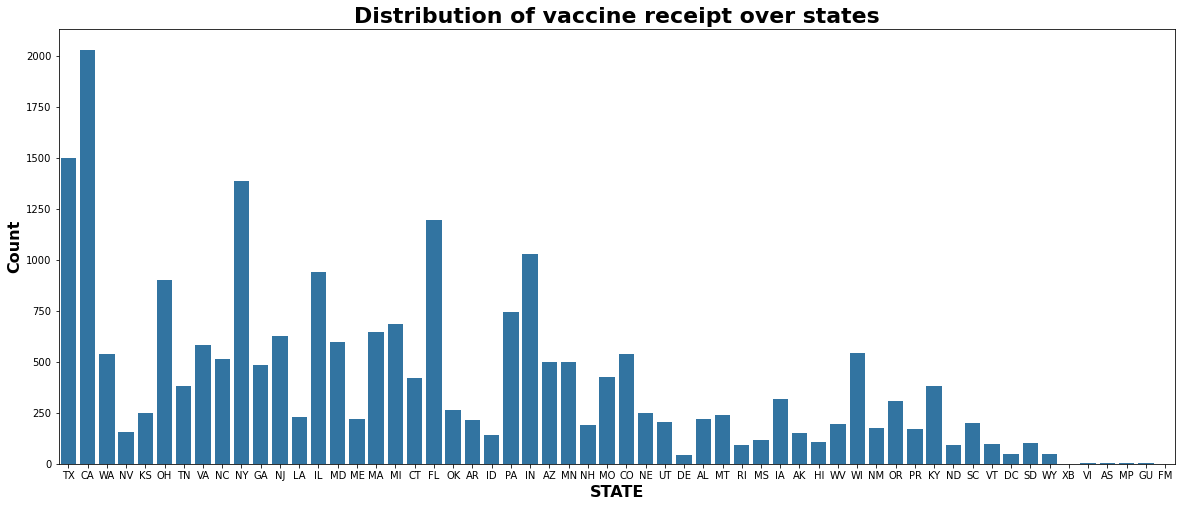

In [48]:
#base color to use only one base color for good visual
base_color = sb.color_palette()[0]


plt.figure(figsize=(20,8))

#plot bar chart to show vaccine receipt disribution over STATES 
sb.countplot(data=VAXC, x='STATE', color=base_color);

#define title ,labels x, y  , fontsize ,fontweight
plt.title('Distribution of vaccine receipt over states' , fontsize = 22, fontweight= 'bold')
plt.xlabel('STATE' , fontsize = 16, fontweight= 'bold')
plt.ylabel('Count',fontsize = 16, fontweight= "bold")

### STATES need to be ordered for clear observation 

Text(0, 0.5, 'Count')

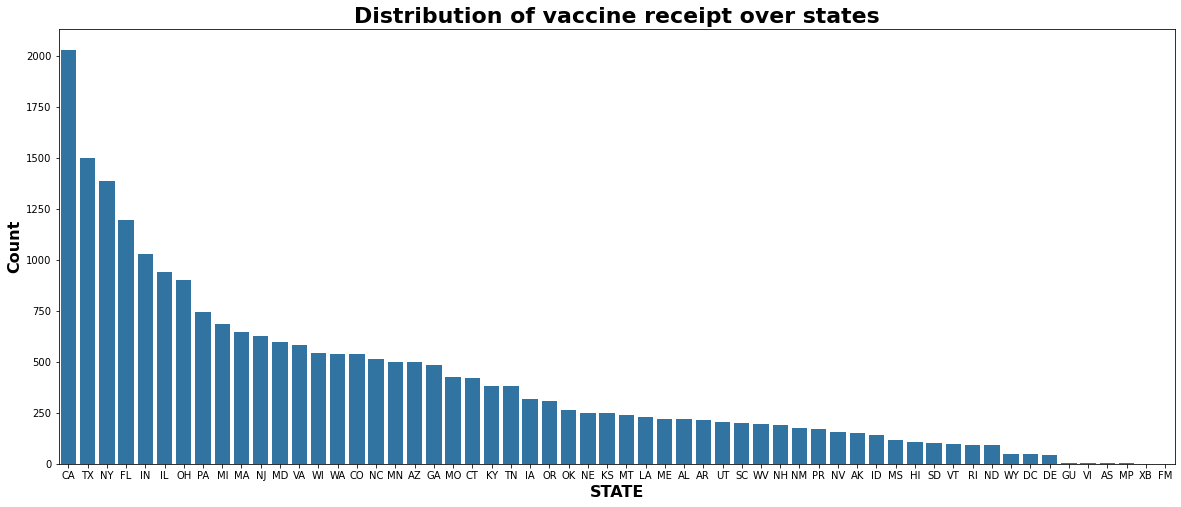

In [49]:
#make plot in order 

plt.figure(figsize=(20,8))

freq1 = VAXC['STATE'].value_counts()

# Get the indexes of the Series
gen_order1 = freq1.index

# Plot the bar chart in the decreasing order of the frequency of the `STATE`
sb.countplot(data=VAXC, x='STATE', color=base_color, order=gen_order1);
plt.title('Distribution of vaccine receipt over states' , fontsize = 22, fontweight= 'bold')
plt.xlabel('STATE' , fontsize = 16, fontweight= 'bold')
plt.ylabel('Count',fontsize = 16, fontweight= "bold")

### CA has the highest  frequent 
### DE has the lowest 
### High destiny of  vaccine receipts in our sample distributed in CA , TX, NY ,  FL , IN . IL, OH

In [50]:
VAXC['STATE'].count()

22971

In [51]:
VAXC['STATE'].value_counts()

CA    2032
TX    1498
NY    1386
FL    1195
IN    1030
IL     943
OH     902
PA     743
MI     685
MA     649
NJ     629
MD     599
VA     582
WI     546
WA     540
CO     537
NC     516
MN     500
AZ     498
GA     485
MO     428
CT     422
KY     381
TN     380
IA     316
OR     310
OK     264
NE     249
KS     248
MT     241
LA     229
ME     221
AL     220
AR     216
UT     205
SC     201
WV     195
NH     189
NM     175
PR     172
NV     154
AK     149
ID     142
MS     119
HI     108
SD     101
VT      95
RI      94
ND      93
WY      49
DC      48
DE      45
GU       5
VI       4
AS       3
MP       3
XB       1
FM       1
Name: STATE, dtype: int64

#CA & TX & NY & FL has the highest frequent 

In [52]:
VAXC['STATE'].value_counts()['CA']+VAXC['STATE'].value_counts()['TX']+VAXC['STATE'].value_counts()['NY']+VAXC['STATE'].value_counts()['FL']

6111

In [53]:
VAXC['STATE'].count()

22971

In [54]:
#percentage of most frequent columns (['CA' , 'TX' , 'NY' , 'FL'])

6111/22971

0.2660310826694528

# 26.6% of vaccine receipt @#CA & TX & NY & FL 

# CAGE_YR

### Discover the range of ages of vaccine receipts


#numeric data,  so i will use histogram 

Text(0, 0.5, 'Count')

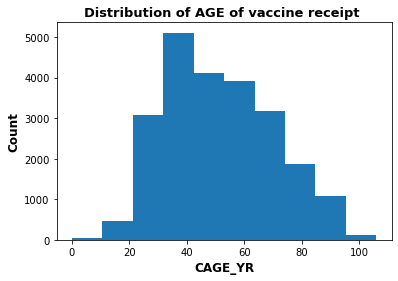

In [55]:
#Plot histogram to show ages range

plt.hist(VAXC['CAGE_YR']);


plt.title('Distribution of AGE of vaccine receipt ' , fontsize = 13, fontweight= 'bold')
plt.xlabel('CAGE_YR' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")


#as we see , the distribution is right skewed
* Ages range between 0 to 100 
* High denisty between 40 to 60

In [56]:
#discover mean , min , max 

VAXC['CAGE_YR'].describe()

count    22971.000000
mean        51.353881
std         18.712513
min          0.000000
25%         36.000000
50%         50.000000
75%         65.000000
max        106.000000
Name: CAGE_YR, dtype: float64

In [57]:
#the elder 10 of vaccine receipts

VAXC.nlargest(10, ['CAGE_YR'])

,VAERS_ID,STATE,CAGE_YR,SEX,DIED,DATEDIED,VAX_DATE,ER_VISIT,L_THREAT,HOSPDAYS,VAX_TYPE,VAX_MANU
31158,1073361,IL,106.0,F,Y,02/19/2021,01/25/2021,NaN,NaN,NaN,COVID19,MODERNA
19874,975223,TX,105.0,F,Y,NaN,01/13/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
24454,1045129,NJ,105.0,F,NaN,NaN,02/10/2021,NaN,NaN,NaN,COVID19,MODERNA
3675,920832,NY,104.0,F,Y,01/04/2021,12/30/2020,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
2122,919052,TN,103.0,F,NaN,NaN,01/04/2021,NaN,NaN,NaN,COVID19,MODERNA
24291,1041656,OH,103.0,F,Y,02/12/2021,02/06/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH
31559,1075349,IL,103.0,F,Y,02/25/2021,01/25/2021,NaN,NaN,NaN,COVID19,MODERNA
6503,924112,WI,102.0,F,NaN,NaN,01/02/2021,NaN,NaN,NaN,COVID19,MODERNA
23684,1033573,MI,102.0,M,NaN,NaN,02/08/2021,NaN,Y,4.0,COVID19,PFIZER\BIONTECH
26687,1048399,PA,102.0,F,Y,NaN,02/01/2021,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH


In [58]:
#count vaccine receipt who elder than 100 years old

VAXC[VAXC.CAGE_YR > 100].count()

VAERS_ID    24
STATE       24
CAGE_YR     24
SEX         24
DIED        16
DATEDIED    14
VAX_DATE    24
ER_VISIT     0
L_THREAT     1
HOSPDAYS     2
VAX_TYPE    24
VAX_MANU    24
dtype: int64

In [59]:
#count of people > 60 years old

VAXC[VAXC.CAGE_YR >60].count()

VAERS_ID    7180
STATE       7180
CAGE_YR     7180
SEX         7180
DIED        1310
DATEDIED    1250
VAX_DATE    7180
ER_VISIT       3
L_THREAT     533
HOSPDAYS    1489
VAX_TYPE    7180
VAX_MANU    7180
dtype: int64

Text(0, 0.5, 'Count')

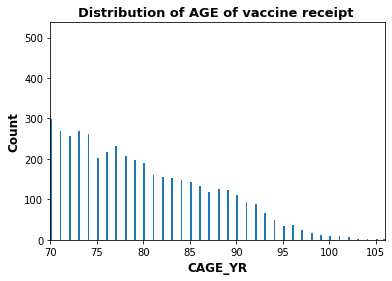

In [60]:
#plot histogram to show distribution for only  vaccine receipt more than 70 years old

bins = np.arange(0, VAXC['CAGE_YR'].max()+0.2, 0.2)
plt.hist(data=VAXC, x='CAGE_YR', bins=bins);

plt.xlim((70,106));

plt.title('Distribution of AGE of vaccine receipt ' , fontsize = 13, fontweight= 'bold')
plt.xlabel('CAGE_YR' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")


Text(0, 0.5, 'Count')

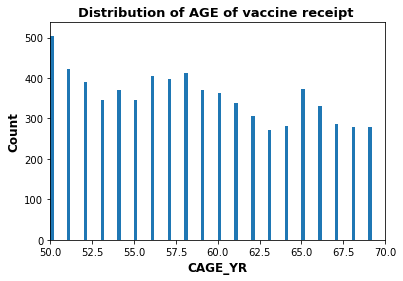

In [61]:
#look at vaccine receipt between 50 to 70 years old

bins = np.arange(0, VAXC['CAGE_YR'].max()+0.2, 0.2)
plt.hist(data=VAXC, x='CAGE_YR', bins=bins);

plt.xlim((50,70));

plt.title('Distribution of AGE of vaccine receipt ' , fontsize = 13, fontweight= 'bold')
plt.xlabel('CAGE_YR' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")

Text(0, 0.5, 'Count')

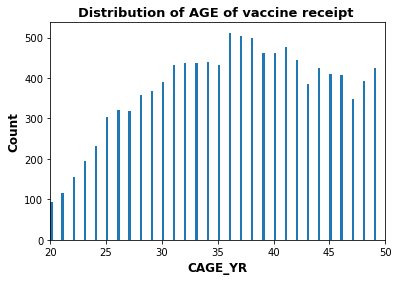

In [62]:
#look at vaccine receipt  between 20 to 50 years old

bins = np.arange(0, VAXC['CAGE_YR'].max()+0.2, 0.2)
plt.hist(data=VAXC, x='CAGE_YR', bins=bins);

plt.xlim((20,50));

plt.title('Distribution of AGE of vaccine receipt ' , fontsize = 13, fontweight= 'bold')
plt.xlabel('CAGE_YR' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")

Text(0, 0.5, 'Count')

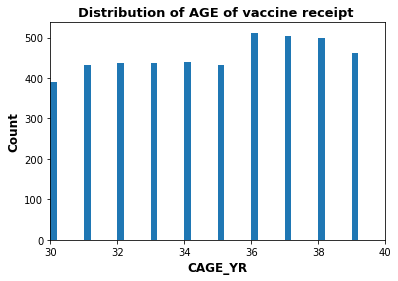

In [63]:
#look at vaccine receipt  between 20 to 50 years old

bins = np.arange(0, VAXC['CAGE_YR'].max()+0.2, 0.2)
plt.hist(data=VAXC, x='CAGE_YR', bins=bins);

plt.xlim((30,40));

plt.title('Distribution of AGE of vaccine receipt ' , fontsize = 13, fontweight= 'bold')
plt.xlabel('CAGE_YR' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")

Text(0, 0.5, 'Count')

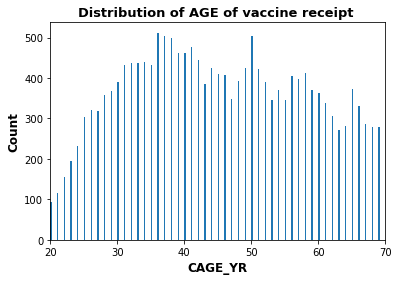

In [64]:
#look at vaccine receipt  between 20 to 70 years old

bins = np.arange(0, VAXC['CAGE_YR'].max()+0.2, 0.2)
plt.hist(data=VAXC, x='CAGE_YR', bins=bins);

plt.xlim((20,70));

plt.title('Distribution of AGE of vaccine receipt ' , fontsize = 13, fontweight= 'bold')
plt.xlabel('CAGE_YR' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")

In [65]:
#calculate mean of ages
VAXC['CAGE_YR'].mean()

51.35388098036655

### The largest amount of vaccine receipt are between 36 to  40  & 50years old

C:\Users\engma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


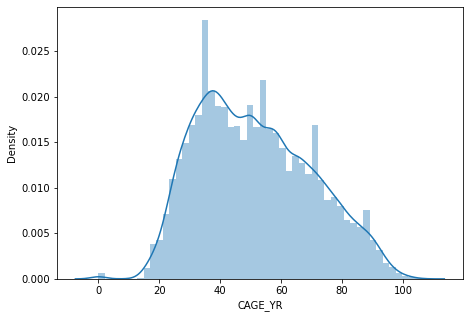

In [66]:
#use distplot for over all view of ages disribution

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sb.distplot(VAXC['CAGE_YR'])

plt.show()

# Age Range between 20 to 100

C:\Users\engma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CAGE_YR'>

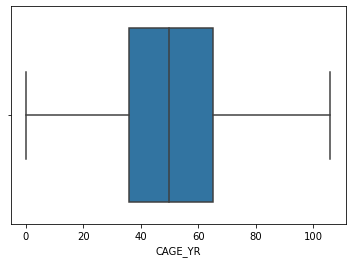

In [67]:
#check outliers 

sb.boxplot(VAXC['CAGE_YR'])

#no outlier shown

# SEX
# which gender has the most freqent records in data sample

(-1.1005956009728444,
 1.1050899637533733,
 -1.1050704571156469,
 1.1006151076105708)

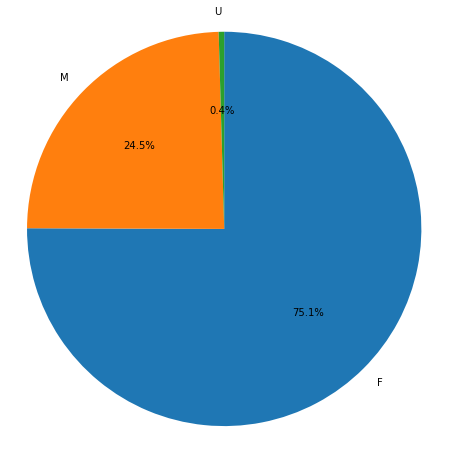

In [68]:
#Using Pie Chart to answer the above question

plt.figure(figsize=(8,8));
SEX_counts = VAXC['SEX'].value_counts()

#specifiy angle for good visual 

plt.pie(SEX_counts, labels = SEX_counts.index, startangle = 90,autopct='%1.1f%%', counterclock = False);
plt.axis('square')

# females recorded 75.1 %  & males only 24.5 %

In [69]:
#look at counts

VAXC.groupby('SEX').count()

,VAERS_ID,STATE,CAGE_YR,DIED,DATEDIED,VAX_DATE,ER_VISIT,L_THREAT,HOSPDAYS,VAX_TYPE,VAX_MANU
SEX,,,,,,,,,,,
F,17241,17241,17241,681,647,17241,9,663,1416,17241,17241
M,5627,5627,5627,795,760,5627,1,399,1028,5627,5627
U,103,103,103,5,5,103,0,2,1,103,103


In [70]:
#female count
len(VAXC.query('SEX == "F"'))

17241

In [71]:
#% Of female are vaccinated

len(VAXC.query('SEX == "F"')) / VAXC['SEX'].count()

0.7505550476687998

In [72]:
#males count
len(VAXC.query('SEX == "M"'))

5627

In [73]:
#% Of males are vaccinated

len(VAXC.query('SEX == "M"')) / VAXC['SEX'].count()

0.2449610378303078

In [74]:
#unkown count
len(VAXC.query('SEX == "U"'))

103

#proportions of vaccinated people depend on sex

# 75.1% female & 24.4 % male 

# DIED

# What is the % of people who DIED after vaccinated

In [75]:
#Calculate DIED values count

VAXC['DIED'].value_counts()

Y    1481
Name: DIED, dtype: int64

#AS WE SEE 1481 DIED OVER 22971
#LETS FILL NAN VALUE TO SHOW 

In [76]:
#fill all null values with "NaN"

print(VAXC.replace('None',np.NaN))

       VAERS_ID STATE  CAGE_YR SEX DIED    DATEDIED    VAX_DATE ER_VISIT  \
0        916600    TX     33.0   F  NaN         NaN  12/28/2020      NaN   
1        916601    CA     73.0   F  NaN         NaN  12/31/2020      NaN   
2        916602    WA     23.0   F  NaN         NaN  12/31/2020      NaN   
3        916603    WA     58.0   F  NaN         NaN  12/23/2020      NaN   
4        916604    TX     47.0   F  NaN         NaN  12/22/2020      NaN   
...         ...   ...      ...  ..  ...         ...         ...      ...   
34622   1113563    HI     70.0   M    Y  03/06/2021  02/24/2021      NaN   
34623   1113915    LA     77.0   F  NaN         NaN  01/25/2021      NaN   
34624   1113916    NY     85.0   M  NaN         NaN  02/01/2021      NaN   
34625   1113917    FL     87.0   F  NaN         NaN  01/13/2021      NaN   
34629   1115348    NC     85.0   F    Y  03/06/2021  03/05/2021      NaN   

      L_THREAT  HOSPDAYS VAX_TYPE         VAX_MANU  
0          NaN       NaN  COVID19 

In [77]:
#fill replace NaN values with 'N'

VAXC['DIED'].fillna('N',inplace=True)

C:\Users\engma\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


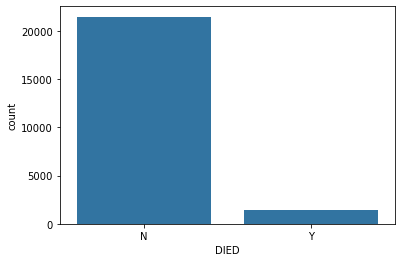

In [78]:
#Try Bar plot to explore

freq3 =VAXC['DIED'].value_counts()

# Get the indexes of the Series
gen_order3 = freq3.index

# Plot the bar chart in the decreasing order of the frequency of the `DIED`
sb.countplot(data=VAXC, x='DIED', color=base_color, order=gen_order3);

# Bar plot not a best choice here Let's try Pie chart

(-1.1064345558967268,
 1.1079453466959113,
 -1.1069260799843614,
 1.1074538226082766)

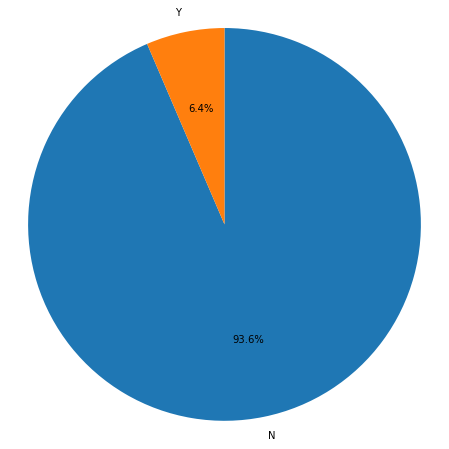

In [79]:
#plot Pie Chart to see the % of DIED people Clearly 

plt.figure(figsize=(8,8));
DIED_counts = VAXC['DIED'].value_counts()
plt.pie(DIED_counts, labels = DIED_counts.index, startangle = 90,autopct='%1.1f%%', counterclock = False);
plt.axis('square')




# 6.4% of vaccinated people are DIED

# ER_VISIT
### What is the % of people who needed emergency room after vaccinated ?

In [80]:
#replace nan values by no to plot

VAXC['ER_VISIT'].fillna('No',inplace=True)

C:\Users\engma\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


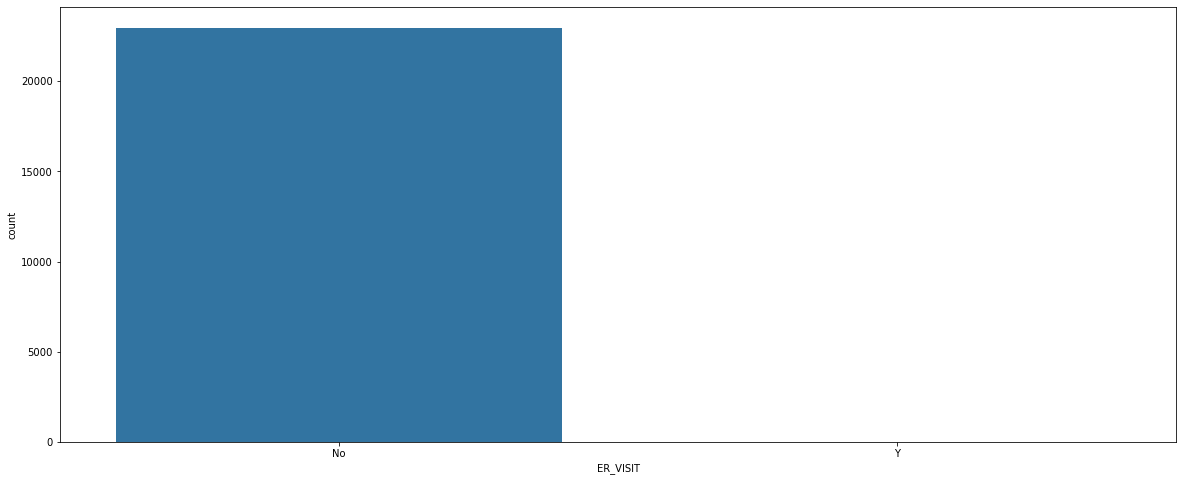

In [81]:
#use bar plot to show the counts who needed emeregency room after vaccinated

plt.figure(figsize=(20,8))
sb.countplot(data=VAXC, x='ER_VISIT', color=base_color);


#Weak graph , its better to use pie chart

(-1.1002850200399619,
 1.1001073648371371,
 -1.1001875201608333,
 1.1002048647162657)

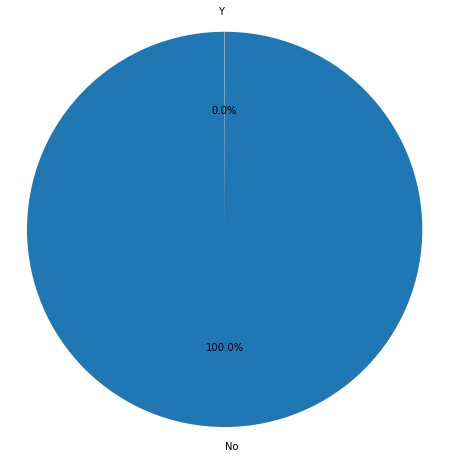

In [82]:
#use bar chart to show % clearly

plt.figure(figsize=(8,8));
EV_counts = VAXC['ER_VISIT'].value_counts()
plt.pie(EV_counts, labels = EV_counts.index, startangle = 90,autopct='%1.1f%%', counterclock = False);
plt.axis('square')

## it seems to small % , let's look at counts

In [83]:
VAXC['ER_VISIT'].value_counts()

No    22961
Y        10
Name: ER_VISIT, dtype: int64

In [84]:
10/VAXC['ER_VISIT'].count()

0.00043533150494101257

# 0.04 % need emergency room after Vaccinatd-- very low %

# L_THREAT

# What is the % of people who faced a threat after vaccinated ?

In [85]:
#fill nan values by no to show

VAXC['L_THREAT'].fillna('No',inplace=True)

C:\Users\engma\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


(-1.1079891192784346,
 1.1071434306609698,
 -1.1079648901888985,
 1.1071676597505058)

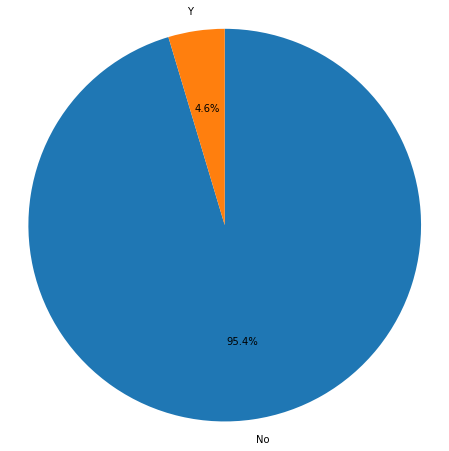

In [86]:
#use Pie chart to show % of  people who faced a threat after vaccinated 

plt.figure(figsize=(8,8));
TH_counts = VAXC['L_THREAT'].value_counts()
plt.pie(TH_counts, labels = TH_counts.index, startangle = 90,autopct='%1.1f%%', counterclock = False);
plt.axis('square')

# 4.6% Faced a threat after vaccinated

## HOSPDAYS

### How many people needed to spent some days on hospitals ? , and what are the averae no of these days ?

Text(0, 0.5, 'Count')

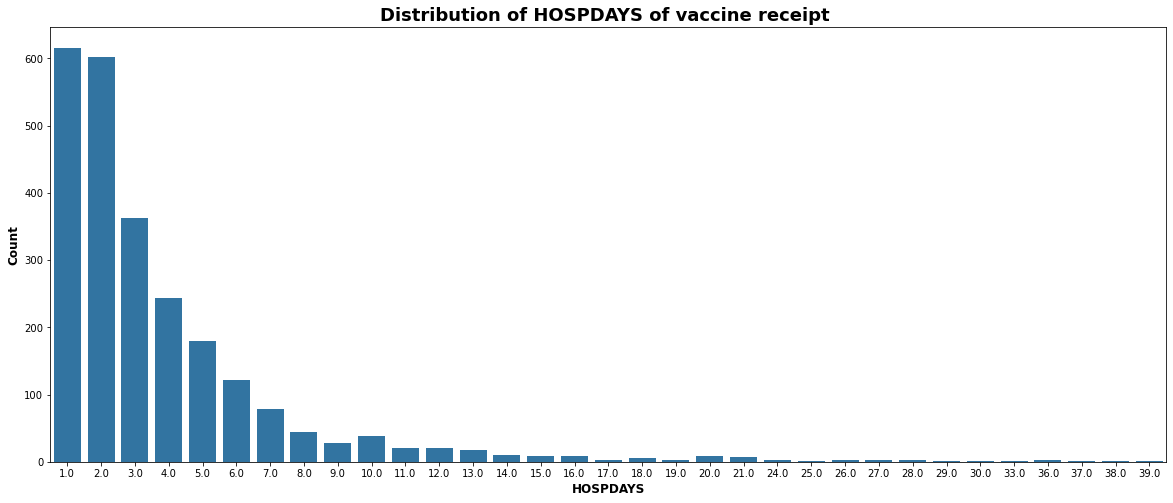

In [87]:
#use bar plot to show the distribution

plt.figure(figsize=(20,8))
sb.countplot(data=VAXC, x='HOSPDAYS', color=base_color);

plt.title('Distribution of HOSPDAYS of vaccine receipt ' , fontsize = 18, fontweight= 'bold')
plt.xlabel('HOSPDAYS' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")


### People who needed to spent days at hospitals ..spent from 1 day to 39 day as max

Text(0, 0.5, 'Count')

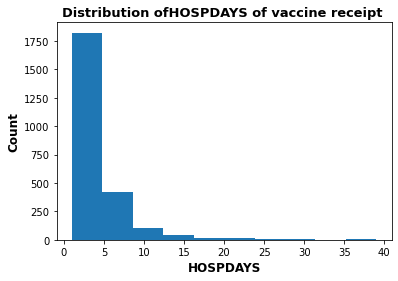

In [88]:

#use histogram to find the range of nost popular days counts 
plt.hist(VAXC['HOSPDAYS']);

plt.title('Distribution ofHOSPDAYS of vaccine receipt ' , fontsize = 13, fontweight= 'bold')
plt.xlabel('HOSPDAYS' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")


## Most People who needed to stay at hospital spent between 0 to 5 days 

In [89]:
#Look at the count of people who needed to stay at hospital 

VAXC['HOSPDAYS'].describe()

count    2445.000000
mean        3.779141
std         3.980966
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        39.000000
Name: HOSPDAYS, dtype: float64

### 2445 needed to stay some days @ hospital

In [90]:
VAXC.shape

(22971, 12)

In [91]:
#% of people who spent somedays @hospital

2445/22971

0.10643855295807758

# 10.6% of vaccinated people need to spend somedays at hospital
# most of patients spent 0 to 5 Days 

### VAX_MANU
### which type of vaccine has the most frequent records ?

Text(0, 0.5, 'Count')

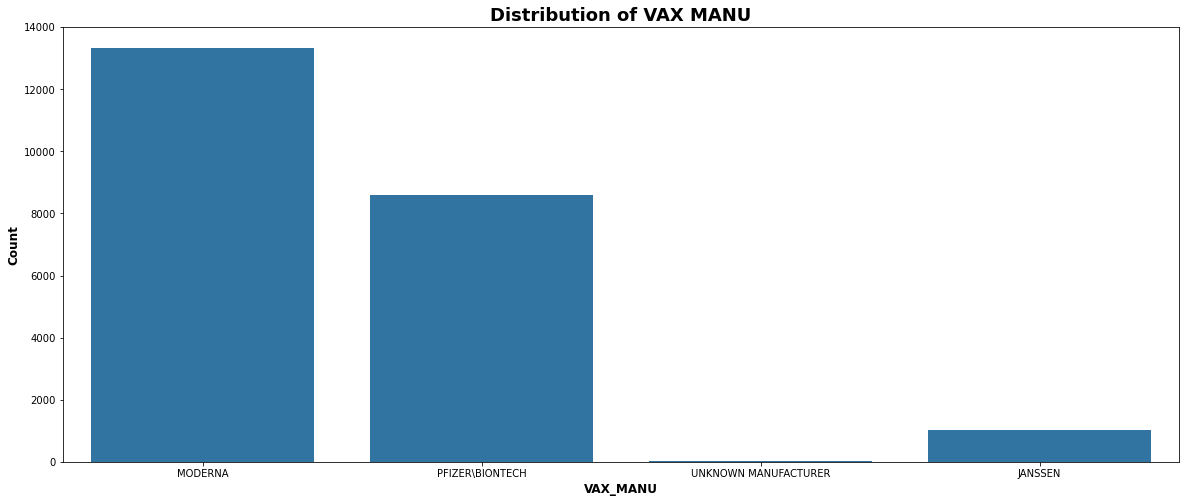

In [92]:
#use bar plot to explore

plt.figure(figsize=(20,8))
sb.countplot(data=VAXC, x='VAX_MANU', color=base_color);

plt.title('Distribution of VAX MANU' , fontsize = 18, fontweight= 'bold')
plt.xlabel('VAX_MANU' , fontsize = 12, fontweight= 'bold')
plt.ylabel('Count',fontsize = 12, fontweight= "bold")

# Moderna has the highest frequent records 

In [93]:
#look at counts

VAXC['VAX_MANU'].value_counts()

MODERNA                 13342
PFIZER\BIONTECH          8584
JANSSEN                  1034
UNKNOWN MANUFACTURER       11
Name: VAX_MANU, dtype: int64

(-1.116971049099727, 1.111590484042993, -1.106875850713769, 1.1216856824289512)

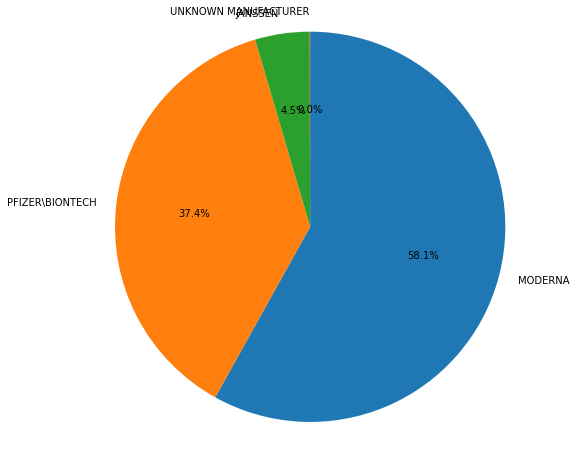

In [94]:
#use Pie chart to discover the % for each vax type
plt.figure(figsize=(8,8));
V_counts = VAXC['VAX_MANU'].value_counts()
plt.pie(V_counts, labels = V_counts.index, startangle = 90,autopct='%1.1f%%', counterclock = False);
plt.axis('square')

# Pie chart is the best choice here for show the distribution of vaccine type
 

### Moderna has the most frequent values 58.1 % 
### Pfizer 37.4 %
### Janssen 4.5 %

# Summary on Univariate Exploration data



## Discuss the distribution(s) of  variable(s) of interest. Were there any unusual points?

There is unusual points found during investigation , here is the summary of what i found in variables distributions

* STATES   : 26.6% of vaccine receipt @#CA & TX & NY & FL
* CAGE_YR  : The largest amount of vaccine receipt are between 36 to  40  & 50years old
* SEX      : 75.1% female & 24.4 % male
* DIED     : 6.4% of vaccinated people are DIED
* ER_VISIT : 0.04 % need emergency room after Vaccinatd
* L_THREAT : 4.6% Faced a threat after vaccinated
* HOSPDAYS : 10.6% of vaccinated people need to spend somedays at hospital-- most of patients spent 0 to 5 Days
* VAX MANU : Moderna has the most frequent values


## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

i have worked with two CSV'S file that needed to be merged first , then i have started  to check missing and duplicated data and cleaned them to avoid any unwanted affect of them on my results ,,

during my investigation i didn't find unusual records or distribution  , 

<a id='Bi'></a>

# Bivariate Exploration

In [95]:
VAXC.sample(10)

,VAERS_ID,STATE,CAGE_YR,SEX,DIED,DATEDIED,VAX_DATE,ER_VISIT,L_THREAT,HOSPDAYS,VAX_TYPE,VAX_MANU
24466,1045145,NJ,79.0,F,N,NaN,02/16/2021,No,No,NaN,COVID19,MODERNA
6291,923883,TX,40.0,F,N,NaN,01/06/2021,No,No,NaN,COVID19,PFIZER\BIONTECH
14281,931307,MO,70.0,M,N,NaN,12/29/2020,No,No,NaN,COVID19,MODERNA
16618,933186,WA,37.0,F,N,NaN,01/03/2021,No,No,NaN,COVID19,MODERNA
21024,994014,MA,52.0,F,N,NaN,01/31/2021,No,No,NaN,COVID19,MODERNA
25677,1046824,NH,74.0,M,N,NaN,02/20/2021,No,No,NaN,COVID19,MODERNA
33203,1086871,WI,41.0,F,N,NaN,01/14/2021,No,No,NaN,COVID19,MODERNA
8399,926101,IL,54.0,F,N,NaN,01/05/2021,No,No,NaN,COVID19,MODERNA
3375,920474,IL,30.0,F,N,NaN,01/04/2021,No,No,NaN,COVID19,MODERNA
17651,934676,WA,58.0,F,N,NaN,12/31/2020,No,Y,3.0,COVID19,PFIZER\BIONTECH


### let's see the relations between AGE & DIED 
### Is age affect on died records ? 

Text(0.5, 1.0, 'DIED Records Over CAGE_YR')

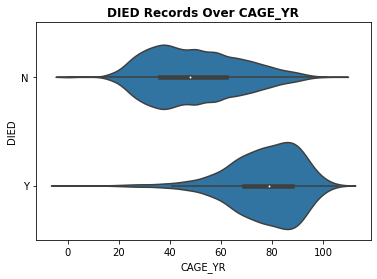

In [96]:
#plot violin to describe the relation between ages and died records 

sb.violinplot(data=VAXC, y='DIED', x='CAGE_YR', color=base_color, innner=None);

plt.title('DIED Records Over CAGE_YR' , fontsize = 12, fontweight= 'bold')

## It seems that there is a relation between Ages & Died records , died records are high between 70 to 100

Text(0.5, 1.0, 'CAGE_YR VS DIED')

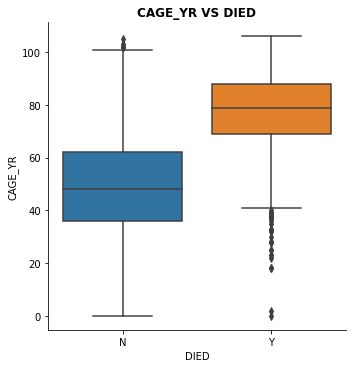

In [97]:
#try box plot for more insights  to describe the relation between ages and died records 

sb.catplot( data = VAXC, x='DIED' , y ='CAGE_YR', kind= 'box')

plt.title('CAGE_YR VS DIED' , fontsize = 12, fontweight= 'bold')

# As shown there is a strong relation between Age & Die ,, most Died people exceed 70 years old

# unsual ponits beyween 0 to 40 for those people who died after vaccinated

# HOSPDAYS VS DIED

### Is there a relations between  people who needed to spent somedays in hospital after vaccinated and died records ??

Text(0.5, 1.0, 'HOSPDAYS VS DIED')

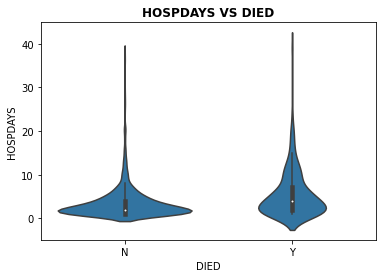

In [98]:
#Plot violin to see the affect of HOSPDAYS records on DIED Records

sb.violinplot(data=VAXC, y='HOSPDAYS', x='DIED', color=base_color, innner=None);

plt.title('HOSPDAYS VS DIED' , fontsize = 12, fontweight= 'bold')

## Insignificant corelation ,

In [99]:

#LOOK AT THE COUNTS FOR EACH GROUP
#Use group_by() and size() to get the number of DIED and each combination of the two variable levels 

N = VAXC.groupby(['DIED', 'HOSPDAYS']).size()
N

DIED  HOSPDAYS
N     1.0         579
      2.0         564
      3.0         343
      4.0         225
      5.0         165
      6.0         101
      7.0          75
      8.0          38
      9.0          23
      10.0         27
      11.0         18
      12.0         13
      13.0         14
      14.0          9
      15.0          6
      16.0          8
      17.0          1
      18.0          5
      19.0          2
      20.0          7
      21.0          6
      24.0          1
      25.0          1
      26.0          3
      27.0          2
      28.0          2
      29.0          1
      30.0          1
      33.0          1
      36.0          2
      37.0          1
      38.0          1
Y     1.0          37
      2.0          38
      3.0          19
      4.0          18
      5.0          15
      6.0          20
      7.0           3
      8.0           6
      9.0           5
      10.0         11
      11.0          3
      12.0          7
      13.0       

# The Relation is Insignificant 

### let's see the relations between SEX & DIED 
## Is Gender has impact on DIED records ?

Text(0.5, 1.0, 'SEX VS DIED')

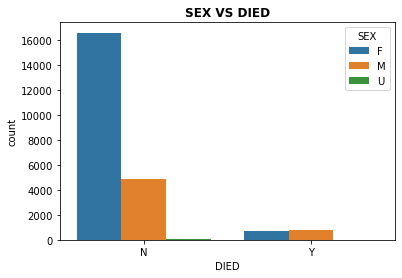

In [100]:
#i will use bar plot to explore the relation between DIED records and Gender

sb.countplot(data = VAXC, x = 'DIED', hue = 'SEX')
plt.title('SEX VS DIED' , fontsize = 12, fontweight= 'bold')

#  %DIED records for male is greater than females althogh the 75% of data sample are females 

In [101]:
#look at counts

O = VAXC.groupby(['DIED', 'SEX']).size()
O

DIED  SEX
N     F      16560
      M       4832
      U         98
Y     F        681
      M        795
      U          5
dtype: int64

In [102]:
# % of females DIED

681/(681+16560)


0.03949886897511745

In [103]:
# % of males Died

795/(795+4832)

0.141283099342456

# Despite the similarity of no died in each gender , the % of male who died are bigger than female 3% DIED in female & 14 % in male 

### let's see the relations between ER_VISIT & DIED 

Text(0.5, 1.0, 'ER_VISIT VS DIED')

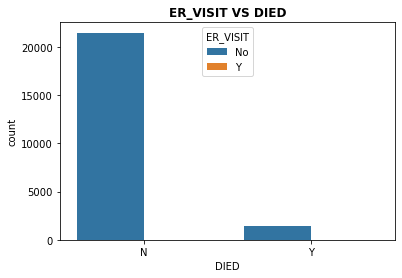

In [104]:
#use bar plot to explore the relation between ER_VISIT & DIED records

sb.countplot(data = VAXC, x = 'DIED', hue = 'ER_VISIT')

plt.title('ER_VISIT VS DIED' , fontsize = 12, fontweight= 'bold')

In [105]:
#look at counts

VAXC['ER_VISIT'].value_counts()

No    22961
Y        10
Name: ER_VISIT, dtype: int64

# very small records of people who need Emeregncy room after vaccinated

In [106]:
# Use group_by() and size() to get the number of DIED and each combination of the two variable levels 

counts = VAXC.groupby(['DIED', 'ER_VISIT']).size()
counts

DIED  ER_VISIT
N     No          21480
      Y              10
Y     No           1481
dtype: int64

# As we see there is no corelation between emergency visits and DIE

### let's see the relations between L_THREAT & DIED 

Text(0.5, 1.0, 'L_THREAT  VS DIED')

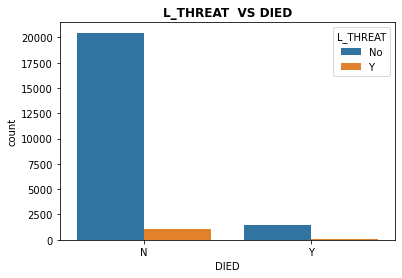

In [107]:
#use bar plot to determine if people who faced a threat after vaccinated died 

sb.countplot(data = VAXC, x = 'DIED', hue = 'L_THREAT')
plt.title('L_THREAT  VS DIED' , fontsize = 12, fontweight= 'bold')

In [108]:
#Look at counts of died records with those who faced a threat after vaccinated 

counts1 =VAXC.groupby(['DIED', 'L_THREAT']).size()
counts1

DIED  L_THREAT
N     No          20461
      Y            1029
Y     No           1446
      Y              35
dtype: int64

# It seems that there is a week corelation between people who faced a threat and who died 
# The relation is insignificant 

### let's see the relations between VAX_MANU & DIED
### which type of vaccine is the most used ??
### which type of vaccine have the highest DIED records ??


Text(0.5, 1.0, 'VAX_MANU VS DIED')

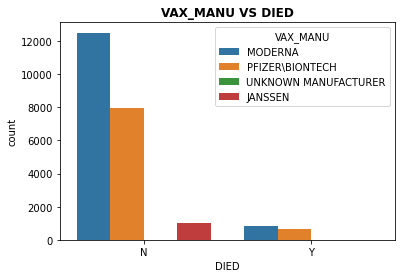

In [109]:
#use bar plot to discover the relation between VAX_MANU & DIED records 

sb.countplot(data = VAXC, x = 'DIED', hue = 'VAX_MANU')

plt.title('VAX_MANU VS DIED' , fontsize = 12, fontweight= 'bold')

# Janssen is the lest vaccine type used in my data sample
# Moderna has the highest frequent

In [110]:
#lets look at value counts for each type of vaccine 

VAXC['VAX_MANU'].value_counts()

MODERNA                 13342
PFIZER\BIONTECH          8584
JANSSEN                  1034
UNKNOWN MANUFACTURER       11
Name: VAX_MANU, dtype: int64

# Unknown manufacturer only 11 so we keep them no need to be removed

In [111]:
#let's looke at value counts for each vaccine type whith DIED records 

counts2 =VAXC.groupby(['DIED', 'VAX_MANU']).size()
counts2

DIED  VAX_MANU            
N     JANSSEN                  1019
      MODERNA                 12512
      PFIZER\BIONTECH          7953
      UNKNOWN MANUFACTURER        6
Y     JANSSEN                    15
      MODERNA                   830
      PFIZER\BIONTECH           631
      UNKNOWN MANUFACTURER        5
dtype: int64

In [112]:
#% DIED WITH MODERNA
830/(12512+830)*100

6.22095637835407

In [113]:
#% DIED WITH PFIZER 
631/(7953+631)*100

7.350885368126747

In [114]:
#% DIED WITH JANSSEN
15/(1019+15)*100

1.4506769825918762

# The Highist % of died recorded in PFIZER 

#  The interesting relationships  observed in this part of the investigation. 

###  As above visuals & statistcs the following variables seems  to have a significant impact on the died records.

* CAGE_YR // 
As shown there is a strong relation between Age & Die ,, most Died people exceed 70 years old
* SEX // 
Despite the aproximately similarity of no who  died in each gender , the % of male who died are bigger than female 3% DIED in female & 14 % in male
* VAX MANU // 
The highist % of died recorded in PFIZER

### following variables seems to have no a significant impact on the died records.

* HOSPDAYS
* LH_THREAR
* ER_VISIT



<a id='MU'></a>

# Multivariate Exploration


#### CAGE_YR VS DIED VS SEX
### let's see if we combined SEX with CAGE_YR records  Thats will affect on DIED records or not 

Text(0.5, 1.0, 'impact of sex & ages together on DIED records  ')

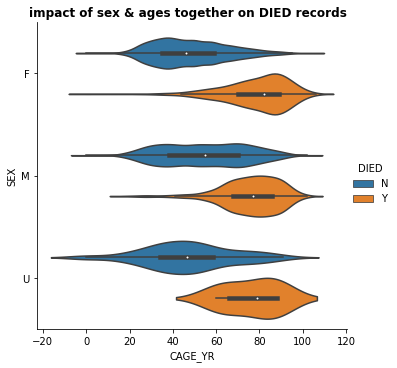

In [115]:
#plot violin to show the impact of sex & ages together on DIED records 

sb.catplot(data = VAXC, x='CAGE_YR' , y='SEX' ,hue='DIED' , kind ="violin")
plt.title('impact of sex & ages together on DIED records  ' , fontsize = 12, fontweight= 'bold')

## It seems Males & Females have the approximately the same manners 

Text(0.5, 1.0, 'impact of sex & ages together on DIED records  ')

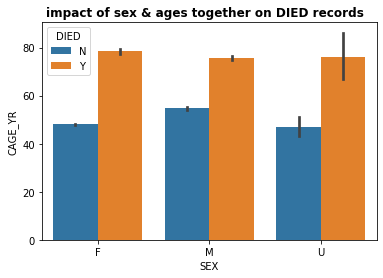

In [116]:

#plot bar plot with the same above variables  for more insights 

sb.barplot(data = VAXC, x = 'SEX', y = 'CAGE_YR', hue = 'DIED')
plt.title('impact of sex & ages together on DIED records  ' , fontsize = 12, fontweight= 'bold')

# As shown @ Violin plot & Bar plot , sex is insignificant here , in all genders we see died records near to 80 Years old

### CAGE_YR  VS. DIED  VS.  VAX_MANU
### let's see the impact of CAGE_YR With VAX_MANY on DIED records 

Text(0.5, 1.0, 'impact of VAX MANU & ages together on DIED records ')

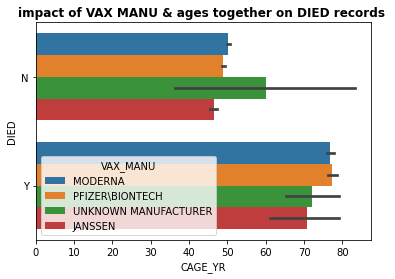

In [117]:

#plot bar plot to compare results of each combination of variables on DIED records

sb.barplot(data = VAXC, x = 'CAGE_YR', y = 'DIED', hue = 'VAX_MANU')
plt.title('impact of VAX MANU & ages together on DIED records ' , fontsize = 12, fontweight= 'bold')

### As we see" No DIED" recorded didn't exceed   50 for moderna , Pfizer and Janssen 
### Most DIED recorded between 70 to 80

Text(0.5, 1.0, 'impact of VAX MANU & ages together on DIED records ')

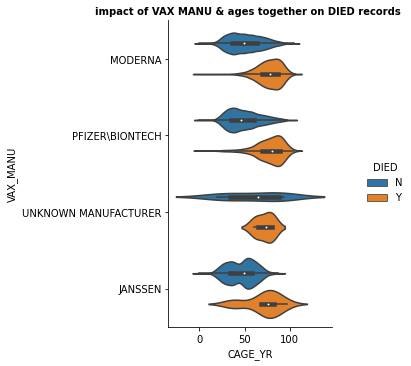

In [118]:

#Try Violin plot using the same above variables  for more insights 

sb.catplot(data = VAXC, x='CAGE_YR' , y='VAX_MANU' ,hue='DIED' , kind ="violin")
plt.title('impact of VAX MANU & ages together on DIED records ' , fontsize = 10, fontweight= 'bold')

### Moderna & Pfizer mostly have the same manners , Janssen slightly different , shown died records in smaller ages < 50

C:\Users\engma\AppData\Local\Temp/ipykernel_18972/2720803521.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  X = VAXC.groupby(['DIED', 'VAX_MANU']).max()['CAGE_YR']


Text(0.5, 1.0, 'Distrubtion of ages over VAX_MANU for DIED records')

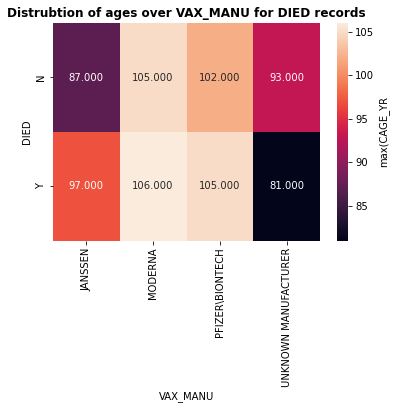

In [119]:

#Try Heatmaps  plot using the same above variables  for more insights 
#using max range of age 

X = VAXC.groupby(['DIED', 'VAX_MANU']).max()['CAGE_YR']
X = X.reset_index(name = 'CAGE_YR')
X = X.pivot(index = 'DIED', columns = 'VAX_MANU',values = 'CAGE_YR')
sb.heatmap(X, annot = True, fmt = '.3f',cbar_kws = {'label' : 'max(CAGE_YR'})

plt.title('Distrubtion of ages over VAX_MANU for DIED records' , fontsize = 12, fontweight= 'bold')

C:\Users\engma\AppData\Local\Temp/ipykernel_18972/2216478596.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  X = VAXC.groupby(['DIED', 'VAX_MANU']).min()['CAGE_YR']


Text(0.5, 1.0, 'Distrubtion of ages over VAX_MANU for DIED records ')

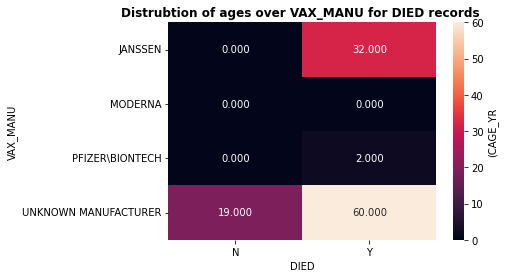

In [120]:

#Try Heatmaps  plot using the same above variables  for more insights 
#using min range of age 

X = VAXC.groupby(['DIED', 'VAX_MANU']).min()['CAGE_YR']
X = X.reset_index(name = 'CAGE_YR')
X = X.pivot(index = 'VAX_MANU', columns = 'DIED',values = 'CAGE_YR')
sb.heatmap(X, annot = True, fmt = '.3f',cbar_kws = {'label' : '(CAGE_YR'})
plt.title('Distrubtion of ages over VAX_MANU for DIED records ' , fontsize = 12, fontweight= 'bold')

# As shown moderna & pfizer seems to have the same manner regarding age and DIED records

# Janssen shown some unsual points due to having higher recoreds for young people who died in 30's

<a id='cr'></a>

# Conclusion & Recommendation 

### Conclusion

* Over all the total visuals & statiscs shown that low % of DIED people after vaccinated approximately 6.4 %
* Most of died people exceed 70 years old 
* Females has the 75 % of total data records 
* %Males who died after vaccinated is higher than females 14% males vs 3% females
* Moderna and Pfizer seems to have the same manners 

### Recommendations 
* to find more insights regarding people who died we need to work with greater samples for males who exceed 60 yrs old 
* we need to work on greater samples for people who janssen vaccinated in age between 18 to 40





<a id='re'></a>

## References 

#### Source of data set 
https://www.kaggle.com/ayushggarg/covid19-vaccine-adverse-reactions?select=2021VAERSSYMPTOMS.csv
https://vaers.hhs.gov/docs/VAERSDataUseGuide_November2020.pdf

#### Sources that helped to proceed this project 

* Stackoverflow
* Youtube
* Github
* Cheat sheets shared on Linked in 

